# LOGISTIC REGRESSION

## Introduction  

Logistic Regression is a **classification algorithm** used to predict the probability of a binary outcome (e.g., Yes/No, 0/1, Pass/Fail).  
Unlike Linear Regression (which predicts continuous values), Logistic Regression predicts **categorical outcomes** by mapping predictions to probabilities between 0 and 1 using the **sigmoid function**:

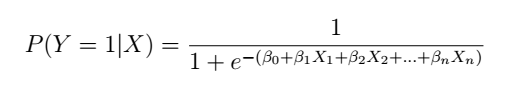

### ✨ Key Points
- **Purpose**: To classify observations into categories (binary or multinomial).  
- **Output**: Probability values (between 0 and 1).  
- **Decision Rule**:  
  - If probability ≥ 0.5 → Class = 1  
  - If probability < 0.5 → Class = 0  
- **Assumptions**:  
  - No perfect multicollinearity among predictors.  
  - Large sample size preferred.  
- **Evaluation Metrics**: Accuracy, Precision, Recall, F1-score, ROC-AUC.  

### ✅ Applications
- Medical diagnosis (disease vs. no disease).  
- Spam email detection.  
- Customer churn prediction.  
- Credit scoring (default vs. no default).  

---


# Task 1: Data Exploration

1. Load the dataset and perform exploratory data analysis (EDA).
2. Examine the features, their types, and summary statistics.
3. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
4. Analyze any patterns or correlations observed in the data.

In [1]:
# Logistic Regression Project — Diabetes Dataset
# Import necessary libraries
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Sklearn tools for ML pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report, confusion_matrix
)

# For statistical inference (p-values for coefficients)
import statsmodels.api as sm

In [5]:
# 1. LOAD DATA & BASIC EXPLORATION
 
df = pd.read_csv("diabetes.csv")

print("Shape of dataset: \n", df.shape)
print("Preview of First 5 rows \n",df.head()) 

print("\nInfo about dataset:")
df.info()

print("\nSummary statistics:")
print(df.describe())

Shape of dataset: 
 (768, 9)
Preview of First 5 rows 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnanc

In [6]:
# Detect numeric columns and target variable
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target = "Outcome"   # in Pima diabetes dataset, target column is Outcome

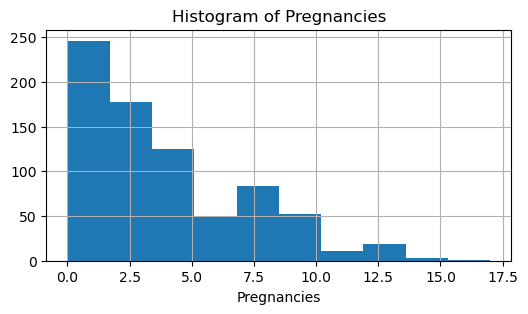

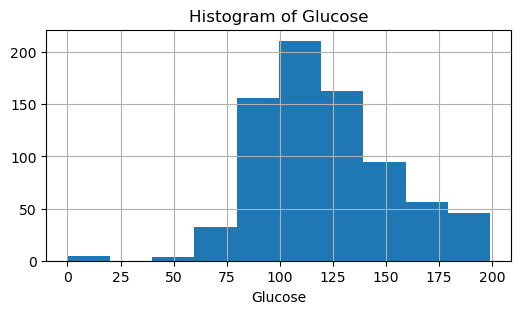

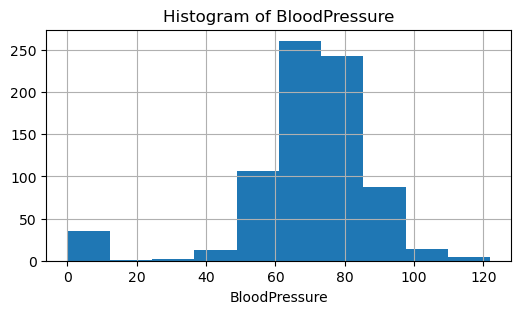

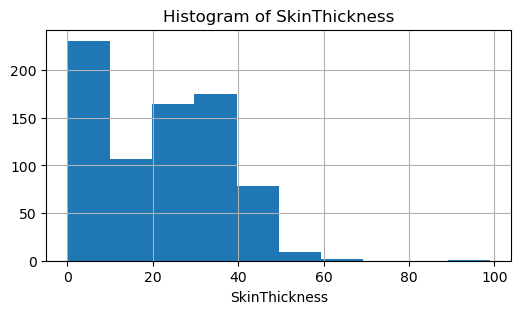

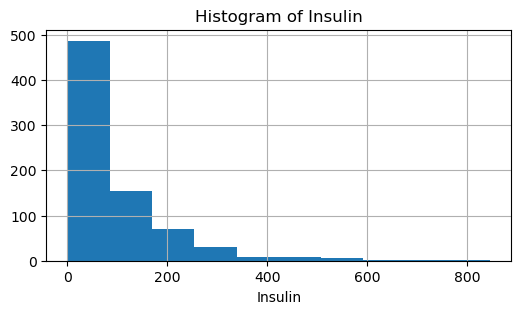

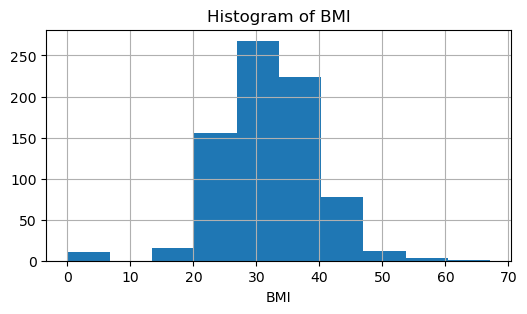

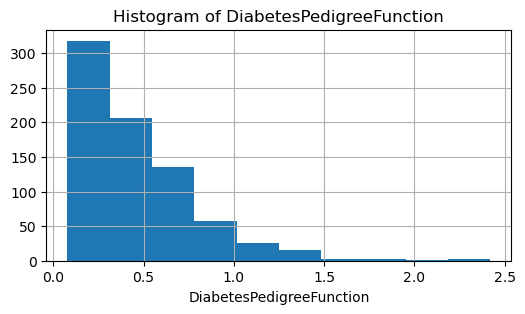

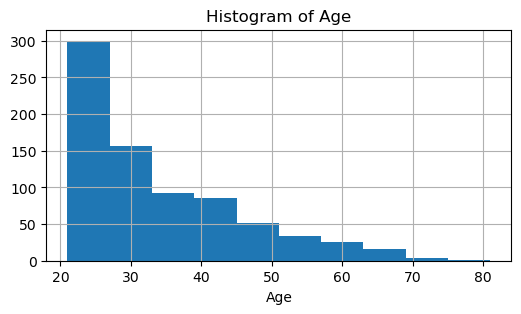

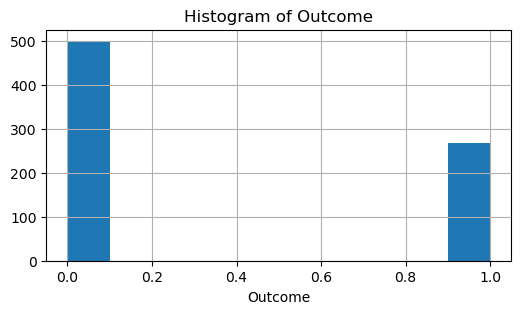

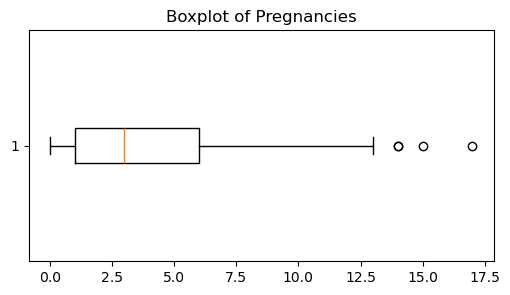

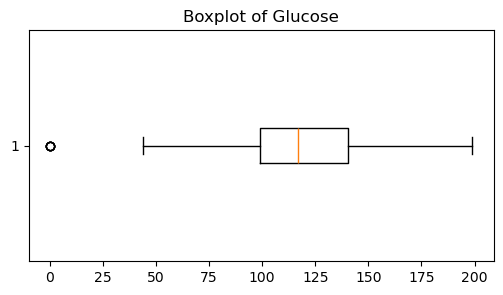

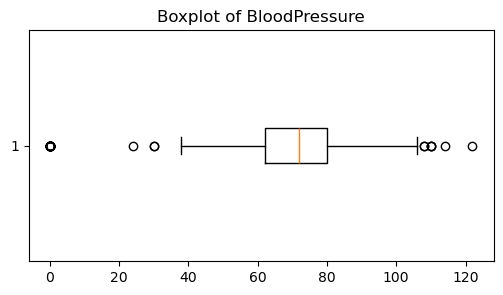

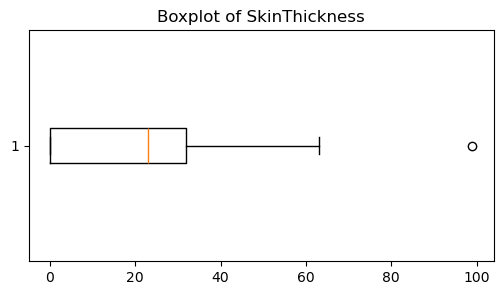

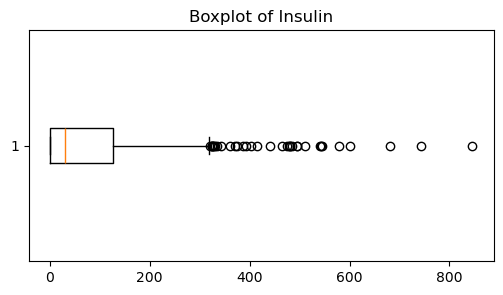

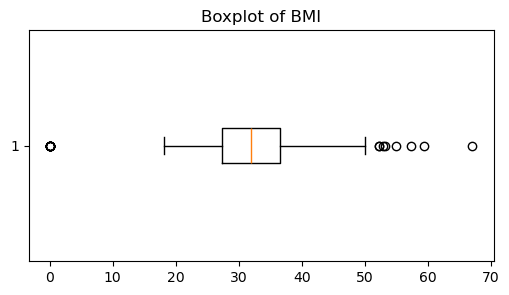

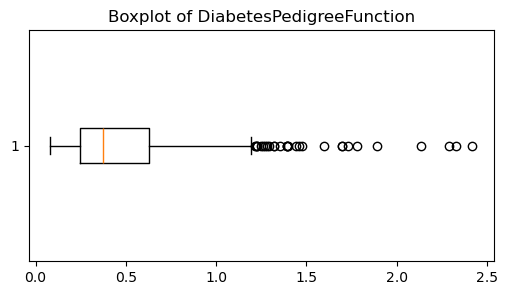

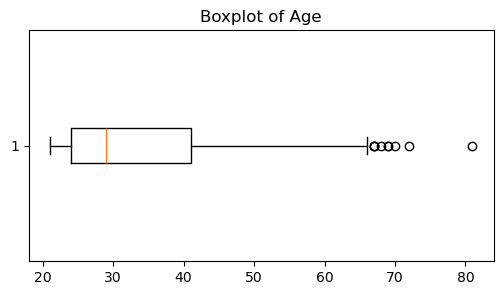

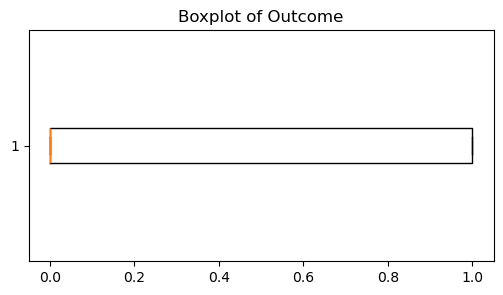

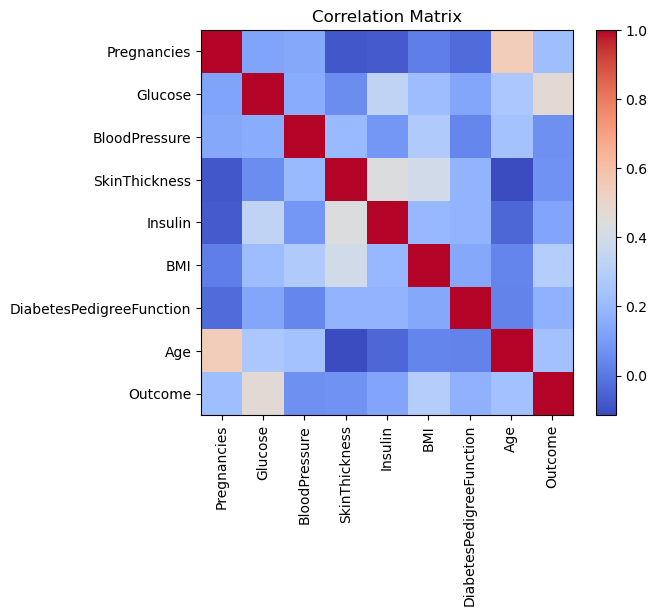

In [7]:
# Quick Exploratory Data Analysis (EDA)
# Histograms — show distribution of each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

# Boxplots — help detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation matrix — see how features relate to each other
corr = df.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

# Task 2: Data Preprocessing:

1. Handle missing values (e.g., imputation).
2. Encode categorical variables.

In [8]:
# In this dataset, some features record "0" for missing values 
# (e.g., Glucose=0 means missing reading).
cols_zero_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_zero_missing] = df[cols_zero_missing].replace(0, np.nan)

In [9]:
# Separate features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

In [10]:
# Identify numeric & categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical features: []


In [11]:
# Preprocessing pipeline
# - Numeric: impute missing with median, then scale
# - Categorical: impute with mode, then one-hot encode
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [12]:
# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Task 3: Model Building

1. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
2. Train the model using the training data.

In [13]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:
# Build pipeline with preprocessing + logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

In [15]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

# Task 4: Model Evaluation

1. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
2. Visualize the ROC curve.

In [16]:
# Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]   # probability of class 1

In [17]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6948051948051948
Precision: 0.574468085106383
Recall: 0.5
F1-score: 0.5346534653465347
ROC-AUC: 0.8127777777777777

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



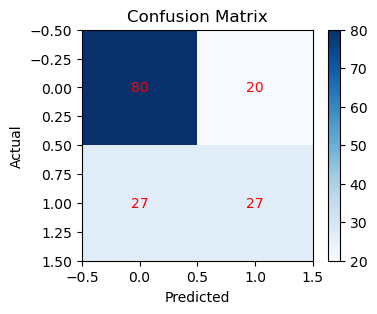

In [18]:
# Confusion Matrix — shows distribution of TP, FP, TN, FN
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
for (i,j), val in np.ndenumerate(cm):
    plt.text(j,i,val,ha='center',va='center', color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

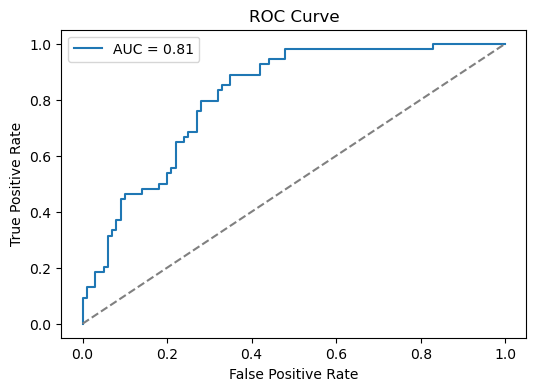

In [19]:
# ROC Curve — tradeoff between sensitivity (recall) and specificity
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test,y_proba):.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Task 5: Interpretation

1. Interpret the coefficients of the logistic regression model.
2. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [20]:
# Logistic regression coefficients → log-odds effect of features
feature_names = numeric_features.copy()
if categorical_features:
    ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    feature_names.extend(ohe.get_feature_names_out(categorical_features))

coefs = pipeline.named_steps['classifier'].coef_.ravel()
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Odds_Ratio": np.exp(coefs)  # exp(coef) = multiplicative change in odds
}).sort_values("Coefficient", key=abs, ascending=False)

print("\nFeature Importance (Coefficients & Odds Ratios):")
print(coef_df)

# Theory note:
# - Positive coefficient → increases likelihood of diabetes
# - Negative coefficient → decreases likelihood
# - Larger |coef| → stronger effect


Feature Importance (Coefficients & Odds Ratios):
                    Feature  Coefficient  Odds_Ratio
1                   Glucose     1.180669    3.256551
5                       BMI     0.687163    1.988068
0               Pregnancies     0.376479    1.457145
6  DiabetesPedigreeFunction     0.233145    1.262565
7                       Age     0.147296    1.158697
4                   Insulin    -0.066132    0.936007
2             BloodPressure    -0.044031    0.956925
3             SkinThickness     0.027398    1.027776


In [21]:
# Optional: get statistical significance with statsmodels
X_train_pre = pipeline.named_steps['preprocessor'].transform(X_train)
X_train_sm = sm.add_constant(X_train_pre)
logit_sm = sm.Logit(y_train, X_train_sm)
result = logit_sm.fit(disp=False)
print(result.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Outcome          Pseudo R-squared: 0.299     
Date:               2025-12-25 11:39 AIC:              574.3781  
No. Observations:   614              BIC:              614.1580  
Df Model:           8                Log-Likelihood:   -278.19   
Df Residuals:       605              LL-Null:          -396.97   
Converged:          1.0000           LLR p-value:      7.4175e-47
No. Iterations:     6.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -0.8772     0.1104   -7.9442   0.0000   -1.0936   -0.6608
x1         0.3857     0.1238    3.1152   0.0018    0.1430    0.6284
x2         1.2070     0.1369    8.8189   0.0000    0.9387    1.4752
x3        -0.0507     0.

# Logistic Regression Report 

> **Model:** Logit (MLE)  
> **Dependent variable:** `Outcome` (binary)  
> **Sample size:** 614 observations

---

## 1. Objective
Fit a binary logistic regression to estimate how predictors `x1`–`x8` affect the probability that `Outcome = 1`. The model uses Maximum Likelihood Estimation (MLE).

---

## 2. Hypotheses

For each predictor Xj:

- **Null hypothesis (H₀):** βj = 0 ( the predictor has **no effect** on the log-odds of `Outcome`.)  
- **Alternative hypothesis (H₁):** βj not equal to 0 ( the predictor **affects** the log-odds of `Outcome`.)

**Decision rule:** reject H₀ if **p-value < 0.05** (two-sided).

---

## 3. Model Fit & Summary Statistics

- **No. observations:** 614  
- **Df Model:** 8 (number of predictors)  
- **Df Residuals:** 605  
- **Log-Likelihood:** -278.19  
- **LL-Null:** -396.97  
- **Likelihood Ratio Test (model vs null):** p = 7.4175e-47 → **model is highly significant overall**.  
- **Pseudo R-squared:** 0.299 → the model explains ~29.9% of the variation in the outcome (interpreted cautiously in logistic regression).  
- **AIC:** 574.3781 (used for model comparison; lower is better)  
- **BIC:** 614.1580 (penalizes model complexity more than AIC)

**Interpretation:** the fitted model is significantly better than an intercept-only model, and has moderate explanatory power for a logistic model.

---

## 4. Coefficients, Significance & Odds Ratios

> Table legend: `Coef` = log-odds coefficient; `Std.Err` = standard error; `z` and `p` = test-statistic and p-value for H₀: β=0; `OR` = exp(Coef) = odds ratio; `95% CI (OR)` = exponentiated coefficient confidence interval.

| Variable | Coef (β) | Std.Err | z | p-value | Odds Ratio (OR = e^β) | 95% CI (OR) |
|---|---:|---:|---:|---:|---:|---:|
| const | -0.8772 | 0.1104 | -7.9442 | 0.0000 | 0.4160 | [0.3350, 0.5164] |
| x1    |  0.3857 | 0.1238 |  3.1152 | 0.0018 | 1.4706 | [1.1537, 1.8746] |
| x2    |  1.2070 | 0.1369 |  8.8189 | 0.0000 | 3.3434 | [2.5567, 4.3719] |
| x3    | -0.0570 | 0.1180 | -0.4302 | 0.6671 | 0.9446 | [0.7543, 1.1978] |
| x4    |  0.0214 | 0.1322 |  0.1612 | 0.8712 | 1.0216 | [0.7884, 1.3239] |
| x5    | -0.0761 | 0.1174 | -0.6486 | 0.5166 | 0.9267 | [0.7362, 1.1664] |
| x6    |  0.7060 | 0.1405 |  5.0254 | 0.0000 | 2.0259 | [1.5382, 2.6679] |
| x7    |  0.2366 | 0.1111 |  2.1296 | 0.0332 | 1.2669 | [1.0190, 1.5751] |
| x8    |  0.1466 | 0.1236 |  1.1856 | 0.2358 | 1.1579 | [0.9087, 1.4754] |

---

## 5. Interpretation (how to read coefficients and ORs)

- Coefficients are in **log-odds**. A **positive** β means the predictor is associated with **higher log-odds** (higher probability) of `Outcome = 1`. A **negative** β means lower log-odds.
- **Odds Ratio (OR = e^β)** gives multiplicative change in odds per one-unit increase in the predictor:
  - OR > 1 → predictor **increases** odds of the outcome.
  - OR < 1 → predictor **decreases** odds of the outcome.
  - Example: `x2` has OR ≈ **3.34** → a one-unit increase in `x2` multiplies the odds of `Outcome=1` by ≈ 3.34 (holding others constant).
  - Example: `const` OR ≈ **0.416** → when all predictors = 0, the baseline odds of `Outcome=1` are 0.416 (i.e., odds < 1).

---

## 6. Significance & Decisions

Using **α = 0.05**:

- **Significant predictors (p < 0.05):** `x1`, `x2`, `x6`, `x7`  
  → These have statistically significant associations with the outcome.
- **Not significant (p ≥ 0.05):** `x3`, `x4`, `x5`, `x8`  
  → No evidence these predictors affect the outcome after controlling for others.

**Recommendation:** Consider simplifying the model by removing non-significant predictors (and then re-evaluating fit and AIC/BIC). However, keep predictors that are theoretically important even if not statistically significant.

---

## 7. Practical Interpretations & Examples

- **x2 (strong effect):** OR ≈ 3.34 (95% CI: 2.56–4.37). This is a large effect: each unit increase in `x2` is associated with more than triple the odds of `Outcome=1`. Highly significant (p ≈ 0).
- **x6 (substantial positive effect):** OR ≈ 2.03 (95% CI: 1.54–2.67). `x6` doubles the odds of the outcome per unit increase.
- **x1 & x7 (moderate effects):** `x1` OR ≈ 1.47; `x7` OR ≈ 1.27 — modest but statistically significant increases in odds.
- **x3, x4, x5, x8 (uncertain):** CIs include 1 (for OR), so their effects could be null.

---

## 8. Goodness-of-Fit & Diagnostics (suggested checks)

1. **ROC / AUC:** compute AUC to evaluate discrimination ability of the model.  
2. **Calibration:** plot predicted probabilities vs observed outcomes (calibration plot / Hosmer–Lemeshow test).  
3. **Multicollinearity:** check VIFs for predictors — high multicollinearity inflates SEs.  
4. **Influence / leverage:** inspect residuals, Cook’s distance, and influential observations.  
5. **Re-estimate reduced model:** drop non-significant predictors and compare AIC/BIC and LR-test with the full model.

---

## 9. Limitations

- **Pseudo R² ~ 0.30** does not mean R² in OLS sense; logistic models often have lower pseudo R².  
- **Causality:** coefficients are associative unless the design is experimental or a causal identification strategy is used.  
- **Model specification:** omitted variable bias and interaction terms may matter. Consider interactions if theory suggests them.  
- **Scale of predictors:** interpretation assumes a one-unit increase — if variables are scaled (e.g., z-scores), be explicit about units.

---

## 10. Final Recommendations

1. Report the **ORs with 95% CIs** and p-values (as in section 4).  
2. Refit a **reduced model** with only significant predictors (`x1, x2, x6, x7`) and compare AIC/BIC and classification performance (ROC/AUC).  
3. Perform diagnostic checks listed in Section 8.  
4. If the goal is interpretability, consider **standardizing** continuous predictors so effect sizes are comparable.  
5. If the aim is prediction, evaluate out-of-sample performance (cross-validation).

---

## Appendix: Quick summary (one-liner)

> The logit model (N=614) is highly significant overall (LR p ≈ 7.4e-47). Key positive predictors increasing the odds of `Outcome=1` are **x2** (largest effect, OR≈3.34), **x6** (OR≈2.03), **x1** (OR≈1.47) and **x7** (OR≈1.27). Four predictors (`x3,x4,x5,x8`) show no statistically significant effect and may be candidates for exclusion after further checks.

---

# Streamlit Deployment Section

In [32]:
import sklearn
print(sklearn.__version__)

1.5.1


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [29]:
import joblib
joblib.dump(pipeline, "logistic_model.pkl")

['logistic_model.pkl']

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']